# Current Trends in Bioinformatics Software Development

In [3]:
from datetime import datetime
import json
import re
import time

import dotenv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
import requests
import warnings
import xmltodict

%reload_ext autoreload
%autoreload 2
import pbmd_tools as pbmd

In [2]:
pbmd.read_tokens()
GITHUB_TOKEN = os.environ.get("GITHUB_TOKEN")
PUBMED_TOKEN = os.environ.get("PUBMED_TOKEN")

## 1. PubMed API Entrez Interactions

In [3]:
db = "pubmed"
domain = "https://www.ncbi.nlm.nih.gov/entrez/eutils"
retmode = "json"
queries_github = []
queries_gitlab = []
queries_sourceforge = []
queries_googlecode = []
for year in range(2009,2024):
    queries_github.append(f'((github.com[Title/Abstract])) AND (("{year}/01/01"[Date - Publication] : "{year}/12/31"[Date - Publication]))')
    queries_gitlab.append(f'((gitlab.com[Title/Abstract])) AND (("{year}/01/01"[Date - Publication] : "{year}/12/31"[Date - Publication]))')
    queries_sourceforge.append(f'((sourceforge.net[Title/Abstract])) AND (("{year}/01/01"[Date - Publication] : "{year}/12/31"[Date - Publication]))')
    queries_googlecode.append(f'(googlecode) AND ("{year}/01/01"[Date - Publication] : "{year}/12/31"[Date - Publication])')

In [222]:
stats_github = {}
stats_gitlab = {}
stats_sourceforge = {}
stats_googlecode ={}
PMIDs = []
for query in tqdm(queries_github):
    nb = 0
    queryLinkSearch = f"{domain}/esearch.fcgi?db={db}&retmode={retmode}&retmax=15000&term={query}"
    response = requests.get(queryLinkSearch)
    pubmed_json = response.json()
    for id in pubmed_json["esearchresult"]["idlist"]:
        nb += 1
        PMIDs.append(id)
    stats_github[query[38:42]] = nb
for query in tqdm(queries_gitlab):
    nb = 0
    queryLinkSearch = f"{domain}/esearch.fcgi?db={db}&retmode={retmode}&retmax=15000&term={query}"
    response = requests.get(queryLinkSearch)
    pubmed_json = response.json()
    for id in pubmed_json["esearchresult"]["idlist"]:
        nb += 1
    stats_gitlab[query[38:42]] = nb
for query in tqdm(queries_sourceforge):
    nb = 0
    queryLinkSearch = f"{domain}/esearch.fcgi?db={db}&retmode={retmode}&retmax=15000&term={query}"
    response = requests.get(queryLinkSearch)
    pubmed_json = response.json()
    for id in pubmed_json["esearchresult"]["idlist"]:
        nb += 1
    stats_sourceforge[query[43:47]] = nb
for query in tqdm(queries_googlecode):
    nb = 0
    queryLinkSearch = f"{domain}/esearch.fcgi?db={db}&retmode={retmode}&retmax=15000&term={query}"
    response = requests.get(queryLinkSearch)
    pubmed_json = response.json()
    for id in pubmed_json["esearchresult"]["idlist"]:
        nb += 1
    stats_googlecode[query[19:23]] = nb

print(f"\n{len(PMIDs)} articles with 'github.com' found in PubMed")
PMIDs = list(set(PMIDs))
print(f"\n{len(PMIDs)} articles with 'github.com' found in PubMed")

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:10<00:00,  1.45it/s]


13016 articles with 'github.com' found in PubMed

12207 articles with 'github.com' found in PubMed


In [23]:
with open("PMIDs.txt", "w") as f:
    for PMID in PMIDs:
        f.write(str(PMID)+"\n")
with open("stats_github.json", "w") as f:
    json.dump(stats_github, f)
with open("stats_gitlab.json", "w") as f:
    json.dump(stats_gitlab, f)
with open("stats_sourceforge.json", "w") as f:
    json.dump(stats_sourceforge, f)    
with open("stats_googlecode.json", "w") as f:
    json.dump(stats_googlecode, f)

In [4]:
with open("stats_github.json", "r") as f:
    stats_github = json.load(f)
with open("stats_gitlab.json", "r") as f:
    stats_gitlab = json.load(f)
with open("stats_sourceforge.json", "r") as f:
    stats_sourceforge = json.load(f)
with open("stats_googlecode.json", "r") as f:
    stats_googlecode = json.load(f)
with open("PMIDs.txt", "r") as f:
    PMIDs = f.readlines()
PMIDs = [PMID.strip() for PMID in PMIDs]

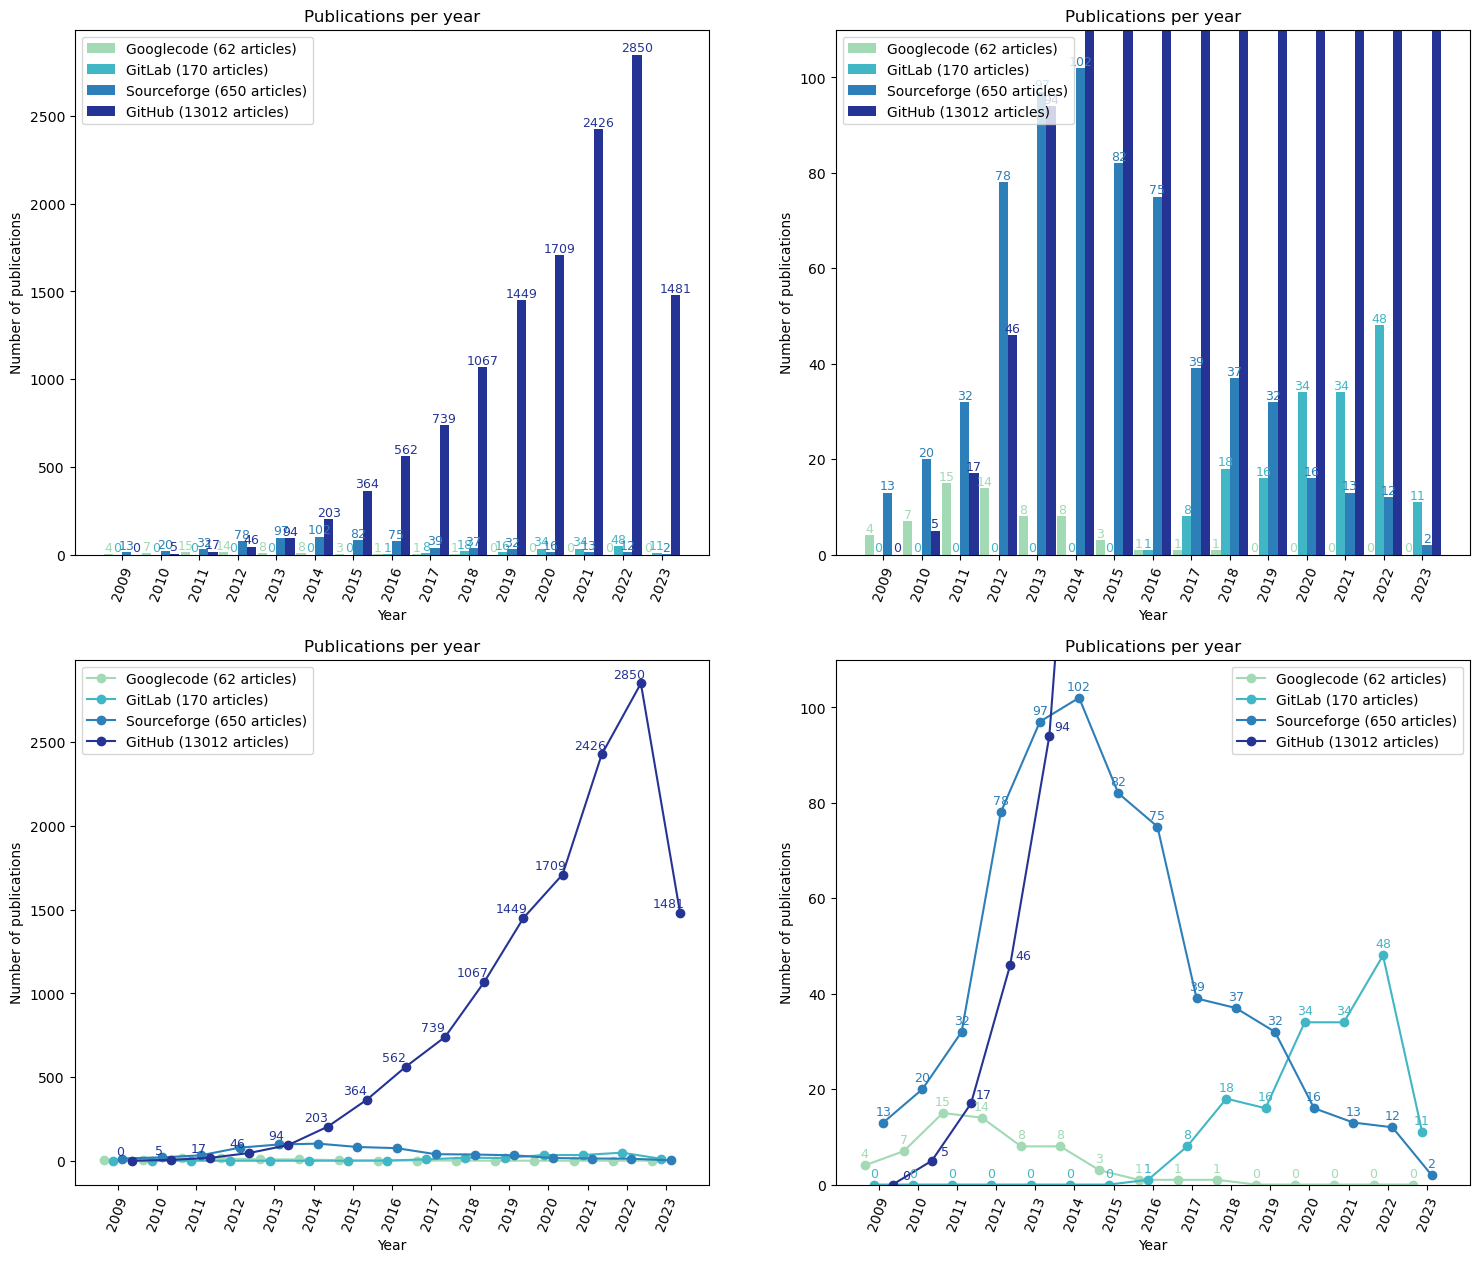

In [221]:
fig, ax = plt.subplots(2,2, figsize=(18, 15))

years = list(stats_github.keys())
    
values_github = list(stats_github.values())
values_gitlab = list(stats_gitlab.values())
values_sourceforge = list(stats_sourceforge.values())
values_googlecode = list(stats_googlecode.values())

bar_width = 0.24
x_pos = np.arange(len(years)) 


ax[0,0].bar(x_pos - bar_width*3/2, values_googlecode, width=bar_width, color='#a1dab4',  zorder=2)
ax[0,0].bar(x_pos - bar_width*1/2, values_gitlab, width=bar_width, color='#41b6c4',  zorder=2)
ax[0,0].bar(x_pos + bar_width*1/2, values_sourceforge, width=bar_width, color='#2c7fb8', zorder=2)
ax[0,0].bar(x_pos + bar_width*3/2, values_github, width=bar_width, color='#253494', zorder=2)

ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Number of publications')
ax[0,0].set_title('Publications per year')
ax[0,0].set_xticks(x_pos)
ax[0,0].set_xticklabels(years, rotation=70)

ax[0,0].legend([f'Googlecode ({sum(values_googlecode)} articles)', f'GitLab ({sum(values_gitlab)} articles)', 
           f'Sourceforge ({sum(values_sourceforge)} articles)', f'GitHub ({sum(values_github)} articles)'])

for i in range(len(years)):
    ax[0,0].text(i-bar_width*3/2, values_googlecode[i], str(values_googlecode[i]), ha='center', va='bottom', fontsize=9, color='#a1dab4')
    ax[0,0].text(i-bar_width/2, values_gitlab[i], str(values_gitlab[i]), ha='center', va='bottom', fontsize=9, color='#41b6c4')
    ax[0,0].text(i+bar_width/2, values_sourceforge[i], str(values_sourceforge[i]), ha='center', va='bottom', fontsize=9, color='#2c7fb8')
    ax[0,0].text(i+bar_width*3/2, values_github[i], str(values_github[i]), ha='center', va='bottom', fontsize=9, color='#253494')

ax[0,1].bar(x_pos - bar_width*3/2, values_googlecode, width=bar_width, color='#a1dab4',  zorder=2)
ax[0,1].bar(x_pos - bar_width*1/2, values_gitlab, width=bar_width, color='#41b6c4',  zorder=2)
ax[0,1].bar(x_pos + bar_width*1/2, values_sourceforge, width=bar_width, color='#2c7fb8', zorder=2)
ax[0,1].bar(x_pos + bar_width*3/2, values_github, width=bar_width, color='#253494', zorder=2)

ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Number of publications')
ax[0,1].set_title('Publications per year')
ax[0,1].set_xticklabels(years, rotation=70)

ax[0,1].legend([f'Googlecode ({sum(values_googlecode)} articles)', f'GitLab ({sum(values_gitlab)} articles)', 
           f'Sourceforge ({sum(values_sourceforge)} articles)', f'GitHub ({sum(values_github)} articles)'])

for i in range(len(years)):
    if values_github[i] <  110:
        ax[0,1].text(i+bar_width*3/2, values_github[i], str(values_github[i]), ha='center', va='bottom', fontsize=9, color='#253494')
    ax[0,1].text(i-bar_width*3/2, values_googlecode[i], str(values_googlecode[i]), ha='center', va='bottom', fontsize=9, color='#a1dab4')
    ax[0,1].text(i-bar_width/2, values_gitlab[i], str(values_gitlab[i]), ha='center', va='bottom', fontsize=9, color='#41b6c4')
    ax[0,1].text(i+bar_width/2, values_sourceforge[i], str(values_sourceforge[i]), ha='center', va='bottom', fontsize=9, color='#2c7fb8')


ax[0,1].set_ylim(0, 110)


ax[1,0].plot(x_pos - bar_width*3/2, values_googlecode,  marker='o', color='#a1dab4',  zorder=2)
ax[1,0].plot(x_pos - bar_width*1/2, values_gitlab,  marker='o', color='#41b6c4',  zorder=2)
ax[1,0].plot(x_pos + bar_width*1/2, values_sourceforge,  marker='o', color='#2c7fb8', zorder=2)
ax[1,0].plot(x_pos + bar_width*3/2, values_github,  marker='o', color='#253494', zorder=2)

ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Number of publications')
ax[1,0].set_title('Publications per year')
ax[1,0].set_xticks(x_pos)
ax[1,0].set_xticklabels(years, rotation=70)

ax[1,0].legend([f'Googlecode ({sum(values_googlecode)} articles)', f'GitLab ({sum(values_gitlab)} articles)', 
           f'Sourceforge ({sum(values_sourceforge)} articles)', f'GitHub ({sum(values_github)} articles)'])

for i in range(len(years)):
    ax[1,0].text(i+bar_width*3/2-0.3, values_github[i]+15, str(values_github[i]), ha='center', va='bottom', fontsize=9, color='#253494')

ax[1,1].plot(x_pos - bar_width*3/2, values_googlecode,  marker='o', color='#a1dab4',  zorder=2)
ax[1,1].plot(x_pos - bar_width*1/2, values_gitlab,  marker='o', color='#41b6c4',  zorder=2)
ax[1,1].plot(x_pos + bar_width*1/2, values_sourceforge,  marker='o', color='#2c7fb8', zorder=2)
ax[1,1].plot(x_pos + bar_width*3/2, values_github,  marker='o', color='#253494', zorder=2)

ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Number of publications')
ax[1,1].set_title('Publications per year')
ax[1,1].set_xticks(x_pos)
ax[1,1].set_xticklabels(years, rotation=70)

ax[1,1].legend([f'Googlecode ({sum(values_googlecode)} articles)', f'GitLab ({sum(values_gitlab)} articles)', 
           f'Sourceforge ({sum(values_sourceforge)} articles)', f'GitHub ({sum(values_github)} articles)'])

for i in range(len(years)):
    if values_github[i] <  110:
        ax[1,1].text(i+bar_width*3/2+0.33, values_github[i]+0.5, str(values_github[i]), ha='center', va='bottom', fontsize=9, color='#253494')
    ax[1,1].text(i-bar_width*3/2-0.0001, values_googlecode[i]+1, str(values_googlecode[i]), ha='center', va='bottom', fontsize=9, color='#a1dab4')
    ax[1,1].text(i-bar_width/2-0.0001, values_gitlab[i]+1, str(values_gitlab[i]), ha='center', va='bottom', fontsize=9, color='#41b6c4')
    ax[1,1].text(i+bar_width/2-0.0001, values_sourceforge[i]+1, str(values_sourceforge[i]), ha='center', va='bottom', fontsize=9, color='#2c7fb8')


ax[1,1].set_ylim(0, 110)
    
    
plt.show()

In [230]:
# https://pubmed.ncbi.nlm.nih.gov/26262258/ - No DOI in PubMed although there is one in the full text of the article (not from ArXiv), and there are a lot of them
# https://pubmed.ncbi.nlm.nih.gov/28269829/ - they give a wrong link https://github.com/SBU-BMI/imageboxs://github.com/SBU-BMI/imagebox but if you use this link :
# https://github.com/SBU-BMI/imagebox it works. Yet, i am not sure that it is actually what we are looking for since they also provide another link to github.io 
# (also incorect) and i think it's more likely that their code is there
# PMID = 36789260 - 2 links
#https://github.com/tyqGitHub/TYQ/tree/master/GACNNMDA - ????
#https://github.com/mofradlab - ?????? (PMID 36786404)
# PMID = 26124555 - a space in the link
# PMID = 24324759, 22151646 - no space after link
# PMID = 23849037 - why + in the end ?
# PMID = 36315552 - super smart

In [107]:
results = []

#count = 0
for PMID in tqdm(PMIDs):
    #count += 1
    #if count % 10 == 0:
    #    time.sleep(1)
    
    summary = pbmd.get_summary(PMID, PUBMED_TOKEN, "status.txt")
    abstract = pbmd.get_abstract_from_summary(summary, "status.txt")
    pubdate = pbmd.get_pubdate_from_summary(summary, "status.txt")
    title = pbmd.get_title_from_summary(summary, "status.txt")
    journal = pbmd.get_journal_from_summary(summary, "status.txt")
    doi = pbmd.get_doi_from_summary(summary, "status.txt")

    results.append((PMID, pubdate, doi, journal, title, abstract))


100%|████████████████████████████████████████████████████████████████████████████████| 128/128 [01:11<00:00,  1.79it/s]


In [ ]:
df = pd.DataFrame.from_records(results)
df = df.rename(columns={0: 'PMID', 1: 'PubDate', 2: 'DOI', 3: 'Journal', 4: 'Title', 5: 'Abstract'})
df = df.drop_duplicates(subset='PMID', keep=False)
df = df.reset_index(drop=True)
df

In [113]:
print(f"Number of records without publication date is: {len(df[df['PubDate'].isnull()])}")

Number of records without publication date is: 58


In [114]:
df.to_csv('articles.tsv', sep='\t', index=False)

## 2. Geting links from the obtained data using regex

In [103]:
df = pd.read_csv('articles.tsv', sep='\t')

In [197]:
df['GitHub_link_raw'] = df['Abstract'].apply(pbmd.get_link_from_abstract)
df['GitHub_link_clean'] = df['GitHub_link_raw'].astype(str).apply(pbmd.clean_link)
df['GitHub_owner'] = df['GitHub_link_clean'].apply(pbmd.get_owner_from_link)
df['GitHub_repo'] = df['GitHub_link_clean'].apply(pbmd.get_repo_from_link)

In [211]:
print(f"Number of records with weird abstracts leading to inability to extract a link: {len(df[df['GitHub_link_raw'] == ''])}")

Number of records with weird abstracts leading to inability to extract a link: 7


In [215]:
print(f"Number of records without a repository name: {len(df[df['GitHub_repo'].isnull()])-len(df[df['GitHub_owner'].isnull()])}")

Number of records without a repository name: 282


In [223]:
df.to_csv('articles.tsv', sep='\t', index=False)

## 3. GitHub API Interactions

In [32]:
df = pd.read_csv('articles.tsv', sep='\t')

In [224]:
PMIDs = df['PMID'][df['GitHub_repo'].notna()].to_list()
len(PMIDs)

11914

In [229]:
count = 0
for PMID in tqdm(PMIDs):
    count += 1
    if count % 5000 == 0:
        time.sleep(3600)
    
    with open("gitstat.txt", "a") as f:
        f.write(f"\n\n PMID: {PMID}, GitHub link: {df[df['PMID'] == PMID]['GitHub_link_clean'].values[0]}")

    info = pbmd.get_repo_info(df[df['PMID']==PMID]['GitHub_owner'].values[0], df[df['PMID']==PMID]['GitHub_repo'].values[0], GITHUB_TOKEN, "gitstat.txt")

    idx = df.index[df['PMID'] == PMID][0]

    df.loc[idx, "Repo_created_at"] = pbmd.get_repo_date_created(info)
    df.loc[idx, "Repo_updated_at"] = pbmd.get_repo_date_updated(info)
    df.loc[idx, "Fork"] = pbmd.is_fork(info)

100%|██████████████████████████████████████████████████████████████████████████| 11914/11914 [3:07:53<00:00,  1.06it/s]


In [239]:
df.to_csv('articles.tsv', sep='\t', index=False)

## 4. Software Heritage API interactions

In [ ]:
df = pd.read_csv('articles.tsv', sep='\t')

In [242]:
PMIDs = df['PMID'][df['GitHub_repo'].notna()].to_list()
len(PMIDs)

11914

In [270]:
for PMID in tqdm(PMIDs):
    
    info = pbmd.check_is_in_softwh(df[df['PMID']==PMID]['GitHub_link_clean'].values[0])

    idx = df.index[df['PMID'] == PMID][0]
    
    df.loc[idx, "In_SoftWH"] = pbmd.is_in_softwh(info)
    df.loc[idx, "Archived"] = pbmd.get_date_archived(info)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15.18it/s]


In [282]:
df.to_csv('articles.tsv', sep='\t', index=False)

## Unresolved links analysis

In [383]:
df = pd.read_csv('no_info.tsv', sep='\t',usecols=['PMID', 'PubDate', 'DOI', 'Journal', 'Title', 'Abstract', 'Issue', 'GitHub_link_clean','Correct_link'])

In [384]:
print(f"Number of articles with a wrong link (either a space in the link, or no space after link, etc) : {len(df[df['Issue'] == 'wrong link'])}") 

Number of articles with a wrong link (either a space in the link, or no space after link, etc) : 58


In [385]:
print(f"Number of articles with a renamed repository : {len(df[df['Issue'] == 'renamed'])}") 

Number of articles with a renamed repository : 11


In [386]:
print(f"Number of articles with a deleted repository : {len(df[df['Issue'] == 'owner deleted']) + len(df[df['Issue'] == 'repo deleted'])}")

Number of articles with a deleted repository : 146


Resolving unresolved but existing links

In [387]:
df.loc[df['Correct_link'].notna(),'GitHub_owner'] = df.loc[df['Correct_link'].notna(),'Correct_link'].apply(pbmd.get_owner_from_link)
df.loc[df['Correct_link'].notna(),'GitHub_repo'] = df.loc[df['Correct_link'].notna(),'Correct_link'].apply(pbmd.get_repo_from_link)

df.loc[df['Correct_link'].isna(),'GitHub_owner'] = df.loc[df['Correct_link'].isna(),'GitHub_link_clean'].apply(pbmd.get_owner_from_link)
df.loc[df['Correct_link'].isna(),'GitHub_repo'] = df.loc[df['Correct_link'].isna(),'GitHub_link_clean'].apply(pbmd.get_repo_from_link)

In [389]:
PMIDs = df['PMID'][df['GitHub_repo'].notna()].to_list()
len(PMIDs)

215

In [390]:
count = 0
for PMID in tqdm(PMIDs):
    count += 1
    if count % 5000 == 0:
        time.sleep(3600)
    
    with open("gitstat.txt", "a") as f:
        f.write(f"\n\n PMID: {PMID}, GitHub link: {df[df['PMID'] == PMID]['Correct_link'].values[0]}")

    info = pbmd.get_repo_info(df[df['PMID']==PMID]['GitHub_owner'].values[0], df[df['PMID']==PMID]['GitHub_repo'].values[0], GITHUB_TOKEN, "gitstat.txt")

    idx = df.index[df['PMID'] == PMID][0]

    df.loc[idx, "Repo_created_at"] = pbmd.get_repo_date_created(info)
    df.loc[idx, "Repo_updated_at"] = pbmd.get_repo_date_updated(info)
    df.loc[idx, "Fork"] = pbmd.is_fork(info)

100%|████████████████████████████████████████████████████████████████████████████████| 215/215 [01:05<00:00,  3.30it/s]


In [391]:
PMIDs = df['PMID'][df['Correct_link'].notna()].to_list()
len(PMIDs)

69

In [392]:
for PMID in tqdm(PMIDs):
    
    info = pbmd.check_is_in_softwh(df[df['PMID']==PMID]['Correct_link'].values[0])

    idx = df.index[df['PMID'] == PMID][0]
    
    df.loc[idx, "In_SoftWH"] = pbmd.is_in_softwh(info)
    df.loc[idx, "Archived"] = pbmd.get_date_archived(info)

100%|██████████████████████████████████████████████████████████████████████████████████| 69/69 [00:13<00:00,  5.03it/s]


In [393]:
PMIDs = df['PMID'][df['Correct_link'].isna()].to_list()
len(PMIDs)

146

In [394]:
for PMID in tqdm(PMIDs):
    
    info = pbmd.check_is_in_softwh(df[df['PMID']==PMID]['GitHub_link_clean'].values[0])

    idx = df.index[df['PMID'] == PMID][0]
    
    df.loc[idx, "In_SoftWH"] = pbmd.is_in_softwh(info)
    df.loc[idx, "Archived"] = pbmd.get_date_archived(info)

100%|████████████████████████████████████████████████████████████████████████████████| 146/146 [00:56<00:00,  2.60it/s]


In [396]:
print(f"Repositories that are forks : {len(df[df['Fork'] == 1])}")

Repositories that are forks : 0


In [397]:
print(f"Not in SoftWH : {len(df[df['In_SoftWH'] == 0])}")

Not in SoftWH : 118


In [398]:
print(f"In SoftWH : {len(df[df['In_SoftWH'] == 1])}")

In SoftWH : 97


In [401]:
print(f"Were deleted but archived in SoftWH : {len(df[df['Correct_link'].isna()][df['In_SoftWH'] == 1])}")

Were deleted but archived in SoftWH : 49


C:\Users\nadia\AppData\Local\Temp\ipykernel_9668\3996960915.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Were deleted but archived in SoftWH : {len(df[df['Correct_link'].isna()][df['In_SoftWH'] == 1])}")
